# Oilsands analysis

An exploratory analysis of Environment Canada's Open Government Data about the environmental trends within the Oilsands of Alberta. This is a data analysis on the Open Government Oil Sands data from Environment Canada.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

## FISH HEALTH
In this section we explore the health of White Sucker within the Oil Sands Region.

In [2]:
#Get all path pertaining to Wildish health
data_dir = 'data/OilSands/WildFishHealth/'
paths = os.listdir(data_dir)

#### Perform data exploration  on the Various Species

In [24]:
FishHealth = pd.read_csv(data_dir + paths[4])
FishHealth = FishHealth.replace({'-':None})
FishHealth.index = np.arange(len(FishHealth))
FishHealth['Sex'] = FishHealth['Sex (M=Male; F=Female; I=Indeterminate; IM=Immature Male; IF=Immature Female)']
FishHealth['Date'] = FishHealth['Date (yyyy-mm-dd)']
FishHealth = FishHealth.drop(['Sex (M=Male; F=Female; I=Indeterminate; IM=Immature Male; IF=Immature Female)' , 'Date (yyyy-mm-dd)'], axis=1)
dates = FishHealth['Date'].unique()

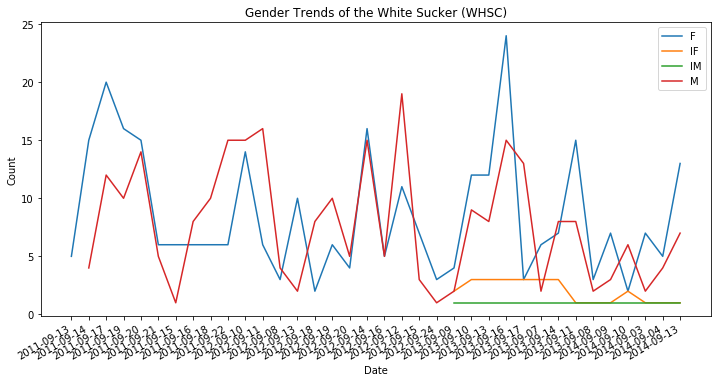

In [4]:
#Clean Sex data
sex = FishHealth.groupby(['Date', 'Sex']).count()
sex['Count'] = sex['Species']
sex = sex.reset_index()

#Visualize Sex Data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in sex.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Count'], label=key) 

fig.autofmt_xdate()
ax.set_title('Gender Trends of the ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc='best')    
plt.show()

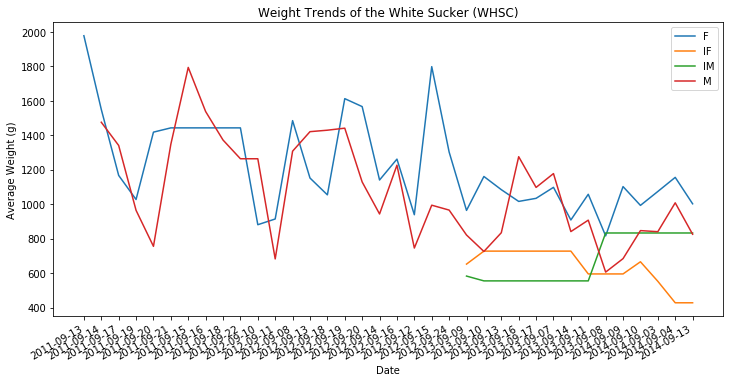

In [400]:
#Generate weight data
weight = FishHealth.groupby(['Date', 'Sex'])['Total Weight (g)'].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Total Weight (g)'], label=key) 

fig.autofmt_xdate()
ax.set_title('Weight Trends of the ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Weight (g)')
plt.legend(loc='best')    
plt.show()

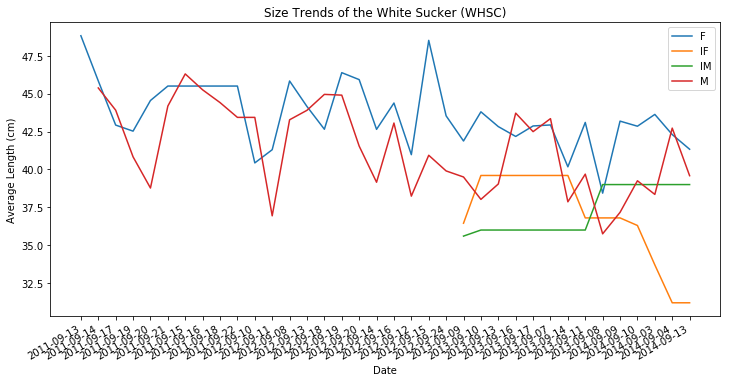

In [5]:
#Generate Length data
weight = FishHealth.groupby(['Date', 'Sex'])['Length      (cm)'].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Length      (cm)'], label=key) 

fig.autofmt_xdate()
ax.set_title('Size Trends of the ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Length (cm)')
plt.legend(loc='best')    
plt.show()

In [31]:
FishHealth.columns
FishHealth['Gonad Weight (g)'] = pd.to_numeric(FishHealth['Gonad Weight (g)'])

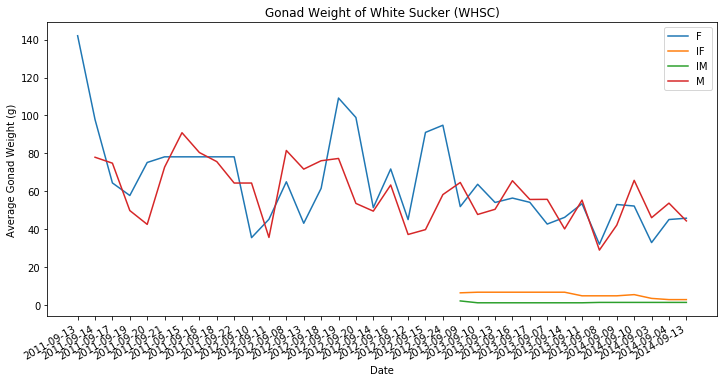

In [35]:
#Generate Length data
weight = FishHealth.groupby(['Date', 'Sex'])['Gonad Weight (g)'].mean()
weight = weight.reset_index()

#Visalize weight data
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for key, grp in weight.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    grp = grp.fillna(method='ffill')
    ax.plot(grp['Date'], grp['Gonad Weight (g)'], label=key) 

fig.autofmt_xdate()
ax.set_title('Gonad Weight of ' + FishHealth.iloc[0]["Species"])
ax.set_xlabel('Date')
ax.set_ylabel('Average Gonad Weight (g)')
plt.legend(loc='best')    
plt.show()